In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Search.csv")

In [3]:
data["Authors"]

0       Parrilla-Escobar M.A.; Quintana-Velasco J.L.; ...
1       Gao C.; Liu D.; Xu C.; Xie W.; Zhang X.; Bai J...
2       Fiorito A.M.; Blasi G.; Brunelin J.; Chowdury ...
3        Suri A.; Avila S.; Tan C.; Alalami H.; Harris J.
4       Kopal J.; Kumar K.; Shafighi K.; Saltoun K.; M...
                              ...                        
9953         Vilaça L.; Viana P.; Carvalho P.; Andrade T.
9954                          Ledgard J.P.; Gschwind C.R.
9955    Pena M.E.R.; Jordão S.; Simões M.J.; Oleastro ...
9956                       Iria C.; Barbosa F.; Paixaõ R.
9957                            Colloff M.F.; Wixted J.T.
Name: Authors, Length: 9958, dtype: object

In [8]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Andrés
[nltk_data]     Dardex\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [11]:
data.keys()

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts',
       'References', 'Correspondence Address', 'Editors', 'Publisher',
       'Sponsors', 'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [29]:
titulos = str
for titulo in data["Author Keywords"]:
    titulos = str(titulo) + " " + str(titulos)
titulos

"Diagnostic-feature-detection; Filler siphoning; Lineups; Showups; Signal-detection theory electrodermal activity; facial affect recognition; monetary reward; offenders with antisocial personality disorder; skin conductance response Osteomyelitis; Rat-bite fever; Streptobacillus moniliformis nerve transfers; outcome; Tetraplegia; upper limb Computer Vision; Content annotation; Deep Learning; Facial detection; Facial recognition; Machine Learning; Object detection nan Autism spectrum disorder; Neurocognition; PAUSS; Schizoaffective; Schizophrenia; Social cognition GABA; Glutamate; Hippocampus; Learning; MRSI; Plasticity accretion; Dynamic imaging; lateral; micro expression recognition Emotion; Emotion recognition; Perception; Sleep deprivation; Social brain-machine interface; intracortical microstimulation; microelectrode array; somatosensory sensory feedback developmental disability; genetics; leukodystrophy; neurodevelopment; pediatric nan nan nan cervical spine; injury; MRI Aperture 

In [30]:
titulos2 = str
for titulo in data["Index Keywords"]:
    titulos2 = str(titulo) + " " + str(titulos2)
titulos2

'Adult; Crime; Criminals; Decision Making; Female; Humans; Male; Mental Recall; Police; Recognition, Psychology; Signal Detection, Psychological; Young Adult; adult; crime; decision making; female; human; male; offender; perceptive discrimination; physiology; police; recall; young adult nan Aged; Animals; Arthritis, Infectious; Bites and Stings; Female; Humans; Lumbar Vertebrae; Magnetic Resonance Imaging; Male; Osteomyelitis; Rat-Bite Fever; Rats; Sternoclavicular Joint; amoxicillin plus clavulanic acid; C reactive protein; ceftriaxone; RNA 16S; aged; arthritis; Article; blood culture; case report; cerebrospinal fluid analysis; clinical article; emergency ward; Europe; evaluation and follow up; female; finger injury; human; hypotension; intervention study; leukocyte differential count; musculoskeletal stiffness; neck pain; nuclear magnetic resonance imaging; physician; polymerase chain reaction; Portugal; quadriplegia; rat bite fever; sequence analysis; spondylitis; sternoclavicular j

In [15]:
stop_words = stopwords.words('english')

In [32]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [33]:
for p in punctuation:
    clean_texto2 = titulos2.lower().replace(p,"")
    
for p in punctuation:
    clean_texto2 = clean_texto2.replace(p,"")


In [17]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [34]:
for stop in stop_words:
    clean_texto_list2 = clean_texto2.split()
    clean_texto_list2 = [i.strip() for i in clean_texto_list2]
    try:
        while stop in clean_texto_list2: clean_texto_list2.remove(stop)
    except:
        print("Error")
        pass
    clean_texto2= " ".join(clean_texto_list2)

In [18]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [35]:
lista_texto2 = clean_texto2.split(" ")

palabras2 = []

for palabra2 in lista_texto2:
    if (len(palabra2)>=3 and len(palabra2)<18):
        palabras2.append(palabra2)

In [19]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [36]:
word_count2={}
for palabra2 in palabras2:
    if palabra2 in word_count2.keys():
        word_count2[palabra2][0]+=1
    else:
        word_count2[palabra2]=[1]

In [20]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

freq
recognition  3327
facial       2423
face         2406
nan          1865
learning     1629
emotion      1494
expression    979
deep          945
neural        825
network       727

In [37]:
df2 = pd.DataFrame.from_dict(word_count2).transpose()
df2.columns=["freq"]
df2.sort_values(["freq"], ascending=False, inplace=True)
df2.head(10)

freq
recognition  11868
facial        9039
human         7569
article       5957
adult         5216
face          4976
male          4571
female        4415
study         4141
learning      3970

In [25]:
df.drop("nan", inplace=True)

In [26]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

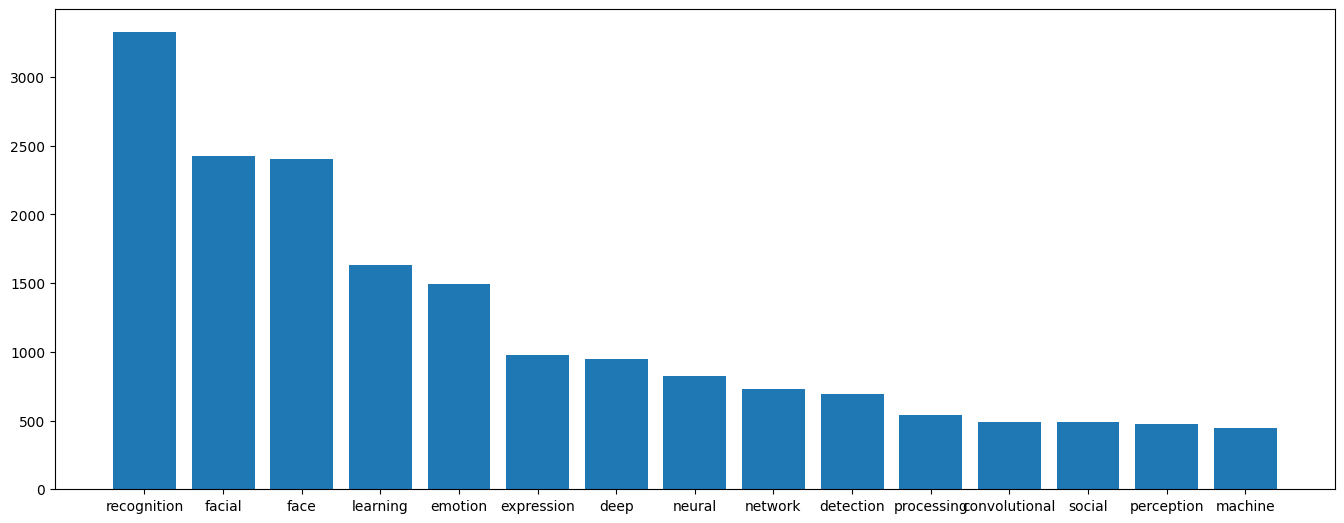

In [27]:
plot_bar(data=df, top=15)

In [38]:
def plot_bar(data=df2, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df2.iloc[:top,:].index, height = df2.iloc[:top,0].values)
    plt.show()

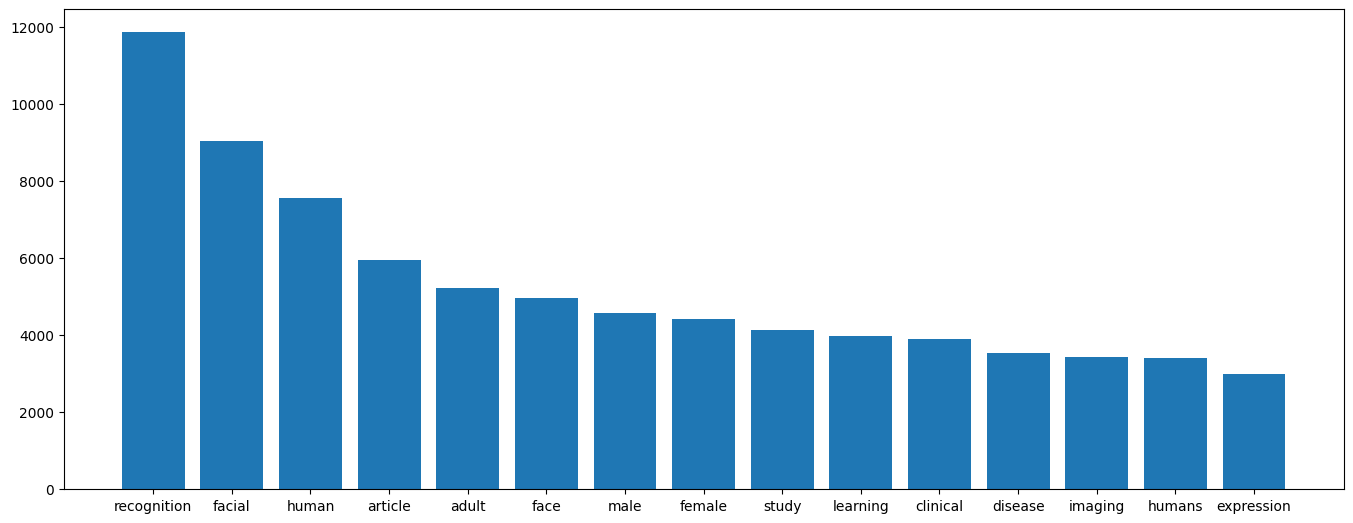

In [39]:
plot_bar(data=df2, top=15)

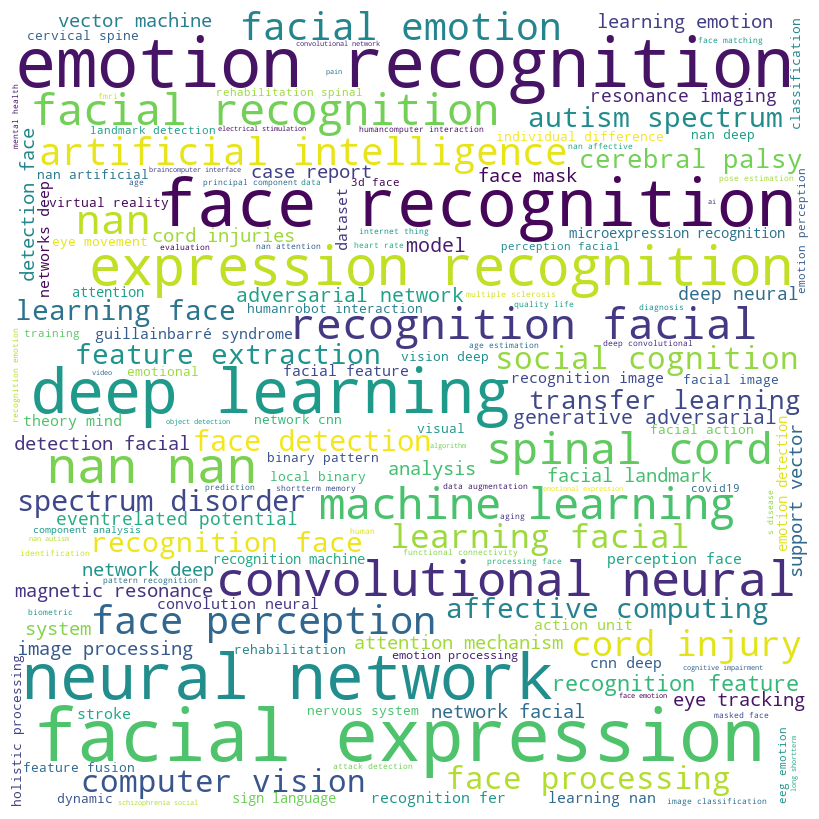

In [23]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

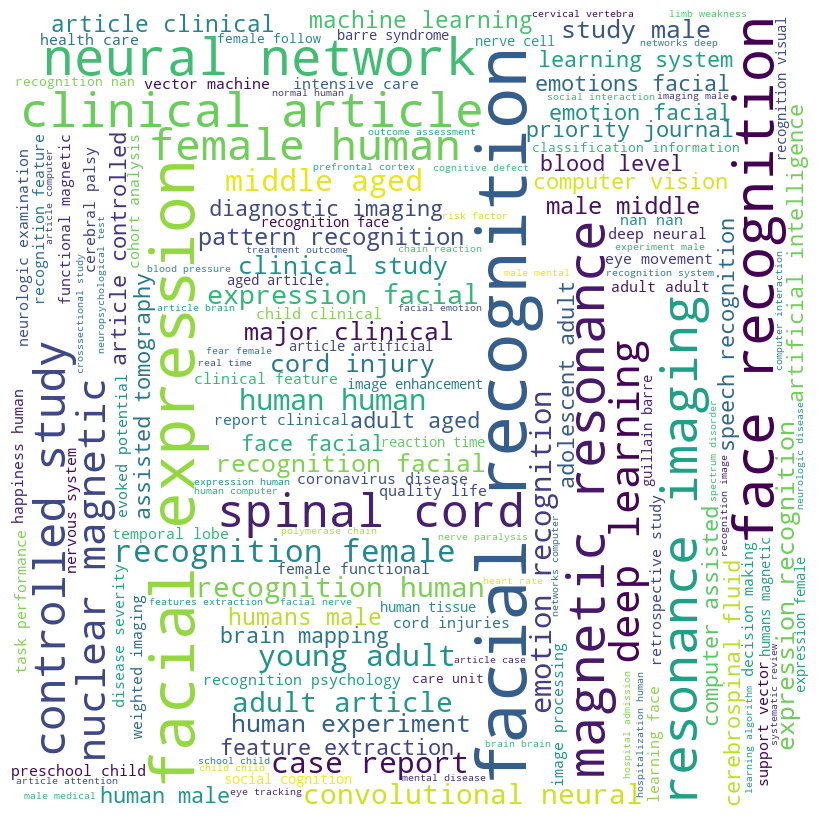

In [40]:
word_cloud2 = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto2)

word_cloud2.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()